# Employment Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as xl
# import os
# import pathlib
from pathlib import Path

import panel as pn
import hvplot.pandas
import holoviews as hv

import bokeh
import jupyter_bokeh

In [2]:
cwd = Path.cwd()
cwd

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/LabourData/notebooks')

In [3]:
def get_filepath(curr_dir, folder, filename):
    """Returns the PosixPath path from the PosixPath under pathlib package.
    
    Args:
        curr_dir (Path): The current working directory as a PosixPath variable.
        folder (str): The folder containing the filename
        filename (str): The filename

    Returns:
        PosixPath:  Absolute path

    >>> get_filepath(Path.cwd(), "project_data/2019-29", "aggregate-economy-tables.xlsx")
    PosixPath('/Users/keshavelango/Desktop/Fall 2024/Big Data Algorithms/Project/project_data/2019-29/aggregate-economy-tables.xlsx')
    """
    path = curr_dir / folder / filename
    return path.resolve()

In [4]:
path_2019_29 = "project_data/2019-29"

In [5]:
agg_economy_name = "aggregate-economy-tables.xlsx"

In [6]:
agg_eco_2019_path_fn = get_filepath(cwd, path_2019_29, agg_economy_name)
agg_eco_2019_path_fn

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/LabourData/notebooks/project_data/2019-29/aggregate-economy-tables.xlsx')

In [7]:
agg_eco_2019_sheet = pd.ExcelFile(agg_eco_2019_path_fn)

In [8]:
path = cwd / path_2019_29 / agg_economy_name
agg_eco_2019_path = path.resolve() 
agg_eco_2019_path

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/LabourData/notebooks/project_data/2019-29/aggregate-economy-tables.xlsx')

In [9]:
pd.read_excel(agg_eco_2019_path)

,Aggregate-economy-tables.xlsx Contents
0,Table 4.1 Labor supply and factors affecting p...
1,Table 4.2 Real gross domestic product by major...
2,Table 4.3 Nominal gross domestic product by ma...
3,Table 4.4 Major assumptions affecting aggregat...


In [10]:
# agg_eco_2019_sheet_xl = pd.ExcelFile(agg_eco_2019_path)

In [11]:
agg_eco_2019_sheet_names = agg_eco_2019_sheet.sheet_names

agg_eco_2019_sheet_dfs = {}

for sheet_name in agg_eco_2019_sheet_names:
    agg_eco_2019_sheet_dfs[sheet_name] = pd.read_excel(agg_eco_2019_path, sheet_name=sheet_name)

In [12]:
agg_eco_2019_sheet_dfs.keys()

dict_keys(['Index', 'Table 4.1', 'Table 4.2', 'Table 4.3', 'Table 4.4'])

In [13]:
agg_eco_2019_sheet_dfs['Index']

,Aggregate-economy-tables.xlsx Contents
0,Table 4.1 Labor supply and factors affecting p...
1,Table 4.2 Real gross domestic product by major...
2,Table 4.3 Nominal gross domestic product by ma...
3,Table 4.4 Major assumptions affecting aggregat...


In [14]:
agg_eco_2019_sheet_dfs['Table 4.1']

,"Table 4.1 Labor supply and factors affecting productivity, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Category,Levels,NaN,NaN,NaN,Annual rate of change,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
2,"Labor supply (in millions, unless noted):",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
4,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
5,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
6,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
7,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
8,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [15]:
agg_eco_2019_sheet_dfs['Table 4.2']

,"Table 4.2 Real gross domestic product by major demand category, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Category,Billions of chained 2012 dollars,NaN,NaN,NaN,Annual rate of change,NaN,NaN,Contribution to percent change in real GDP,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29,1999-09,2009-19,2019-29
2,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8
3,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3
4,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5
5,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3
6,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4
7,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1
8,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0
9,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0


In [16]:
agg_eco_2019_sheet_dfs['Table 4.3']

,"Table 4.3 Nominal gross domestic product by major demand category, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Category,Billions of current dollars,NaN,NaN,NaN,Percent distribution,NaN,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999,2009.0,2019.0,2029.0
2,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0
3,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8
4,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3
5,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2
6,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7
7,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4
8,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2
9,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2


In [17]:
agg_eco_2019_sheet_dfs['Table 4.4']

,"Table 4.4 Major assumptions affecting aggregate projections, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Exogenous variables,Billions of chained 2012 dollars (unless noted),NaN,NaN,NaN,Annual rate of change,NaN,NaN
1,NaN,1999,2009,2019,2029,1999-09,2009-19,2019-29
2,Inflation and monetary policy-related:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Federal funds rate (percent),5,0.2,2.2,2.4,-29.1,29.7,1.2
4,Ninety-day Treasury bill rate (percent),4.8,0.2,2.1,2.3,-29.2,30.2,1
5,Yields on ten-year Treasury notes (percent),5.6,3.3,2.1,2.8,-5.3,-4.1,2.6
6,Consumer Price Index (Compound Annual Growth R...,—,—,—,—,2.6,1.8,2.1
7,"Gross Domestic Product, Price Index (Compound ...",—,—,—,—,2.2,1.7,2.1
8,"Fiscal policy, tax-related:",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Effective Federal marginal tax rate on wages a...,23.3,21.4,21.4,21.4,-0.8,0,0


In [18]:
type(agg_eco_2019_sheet_dfs['Table 4.4'])

pandas.core.frame.DataFrame

In [19]:
agg_eco_2019_sheet_dfs['Table 4.1']

,"Table 4.1 Labor supply and factors affecting productivity, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Category,Levels,NaN,NaN,NaN,Annual rate of change,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
2,"Labor supply (in millions, unless noted):",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
4,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
5,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
6,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
7,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
8,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [20]:
agg_eco_2019_sheet_dfs['Table 4.1'].head()

,"Table 4.1 Labor supply and factors affecting productivity, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Category,Levels,NaN,NaN,NaN,Annual rate of change,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
2,"Labor supply (in millions, unless noted):",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
4,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8


In [21]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns = agg_eco_2019_sheet_dfs['Table 4.1'].iloc[0,:].str.strip()

In [22]:
# agg_eco_2019_sheet_dfs['Table 4.1'].columns = pd.DataFrame(agg_eco_2019_sheet_dfs['Table 4.1'].columns).ffill()

In [23]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns

Index(['Category', 'Levels', nan, nan, nan, 'Annual rate of change', nan, nan], dtype='object', name=0)

In [24]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns = ['Category', 'Year', 'Year', 'Year', 'Year', 'Annual rate of change', 'Annual rate of change', 'Annual rate of change']

In [25]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns

Index(['Category', 'Year', 'Year', 'Year', 'Year', 'Annual rate of change',
       'Annual rate of change', 'Annual rate of change'],
      dtype='object')

In [26]:
agg_eco_2019_sheet_dfs['Table 4.1']

,Category,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change
0,Category,Levels,NaN,NaN,NaN,Annual rate of change,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
2,"Labor supply (in millions, unless noted):",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
4,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
5,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
6,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
7,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
8,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [27]:
agg_eco_2019_sheet_dfs['Table 4.1'] = agg_eco_2019_sheet_dfs['Table 4.1'].iloc[1:]

In [28]:
agg_eco_2019_sheet_dfs['Table 4.1']

,Category,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
2,"Labor supply (in millions, unless noted):",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
4,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
5,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
6,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
7,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
8,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
10,Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9


In [29]:
drop_theshold = int(len(agg_eco_2019_sheet_dfs['Table 4.1']) * 0.25)

In [30]:
agg_eco_2019_sheet_dfs['Table 4.1'] = agg_eco_2019_sheet_dfs['Table 4.1'].dropna(thresh=drop_theshold)

In [31]:
agg_eco_2019_sheet_dfs['Table 4.1']

,Category,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
3,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
4,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
5,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
6,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
7,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
8,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
10,Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9
13,"Private nonfarm business output per hour, chai...",47.5,61.8,69.3,82.5,2.7,1.1,1.8


In [32]:
agg_eco_2019_sheet_dfs['Table 4.1'] = agg_eco_2019_sheet_dfs['Table 4.1'].reset_index(drop=True)
agg_eco_2019_sheet_dfs['Table 4.1']

,Category,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change
0,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
1,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
2,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
3,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
4,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
5,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
6,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
7,Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9
8,"Private nonfarm business output per hour, chai...",47.5,61.8,69.3,82.5,2.7,1.1,1.8


In [33]:
agg_eco_2019_sheet_dfs['Table 4.1'].iloc[0,0] = "Labor supply"

In [34]:
agg_eco_2019_sheet_dfs['Table 4.1']

,Category,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change
0,Labor supply,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
1,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
2,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
3,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
4,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
5,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
6,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
7,Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9
8,"Private nonfarm business output per hour, chai...",47.5,61.8,69.3,82.5,2.7,1.1,1.8


In [35]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns = agg_eco_2019_sheet_dfs['Table 4.1'].iloc[0,:]

In [36]:
agg_eco_2019_sheet_dfs['Table 4.1'] = agg_eco_2019_sheet_dfs['Table 4.1'].iloc[1:,:]
agg_eco_2019_sheet_dfs['Table 4.1']

,Labor supply,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29
1,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
2,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
3,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
4,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
5,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
6,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
7,Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9
8,"Private nonfarm business output per hour, chai...",47.5,61.8,69.3,82.5,2.7,1.1,1.8


In [37]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns

Index(['Labor supply', 1999, 2009.0, 2019.0, 2029.0, '1999-09', '2009-19',
       '2019-29'],
      dtype='object', name=0)

In [38]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns = agg_eco_2019_sheet_dfs['Table 4.1'].columns.astype('str').str.replace(".0","")
agg_eco_2019_sheet_dfs['Table 4.1'].columns

Index(['Labor supply', '1999', '2009', '2019', '2029', '1999-09', '2009-19',
       '2019-29'],
      dtype='object', name=0)

In [39]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns[1:].values.astype('str')

array(['1999', '2009', '2019', '2029', '1999-09', '2009-19', '2019-29'],
      dtype='<U7')

In [40]:
agg_eco_2019_sheet_dfs['Table 4.1']

,Labor supply,1999,2009,2019,2029,1999-09,2009-19,2019-29
1,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
2,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
3,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
4,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
5,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
6,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
7,Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9
8,"Private nonfarm business output per hour, chai...",47.5,61.8,69.3,82.5,2.7,1.1,1.8


In [41]:
agg_eco_2019_sheet_dfs_mlt_1 = agg_eco_2019_sheet_dfs['Table 4.1'].melt(id_vars=["Labor supply"], value_vars=list(agg_eco_2019_sheet_dfs['Table 4.1'].columns[1:].values.astype('str')), var_name = "Year")
agg_eco_2019_sheet_dfs_mlt_1

,Labor supply,Year,value
0,Total population,1999,279.4
1,Civilian noninstitutional population aged 16 a...,1999,207.8
2,Civilian labor force,1999,139.4
3,Civilian labor force participation rate (percent),1999,67.1
4,Civilian household employment,1999,133.5
5,Nonfarm payroll employment,1999,129.2
6,Unemployment rate (percent),1999,4.2
7,"Private nonfarm business output per hour, chai...",1999,47.5
8,Total population,2009,307.1
9,Civilian noninstitutional population aged 16 a...,2009,235.8


In [42]:
agg_eco_2019_sheet_dfs['Table 4.1'].iloc[:,0] = agg_eco_2019_sheet_dfs['Table 4.1'].iloc[:,0].str.strip()

In [43]:
agg_eco_2019_sheet_dfs_tbl_4_1_test = agg_eco_2019_sheet_dfs['Table 4.1'].set_index('Labor supply')
agg_eco_2019_sheet_dfs_tbl_4_1_test

,1999,2009,2019,2029,1999-09,2009-19,2019-29
Labor supply,,,,,,,
Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
Civilian noninstitutional population aged 16 and older,207.8,235.8,259.2,280.0,1.3,0.9,0.8
Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9
"Private nonfarm business output per hour, chained 2012 dollars",47.5,61.8,69.3,82.5,2.7,1.1,1.8


In [44]:
agg_eco_2019_sheet_dfs_tbl_4_1_test.columns

Index(['1999', '2009', '2019', '2029', '1999-09', '2009-19', '2019-29'], dtype='object', name=0)

In [45]:
agg_eco_2019_sheet_dfs_tbl_4_1_test.index

Index(['Total population',
       'Civilian noninstitutional population aged 16 and older',
       'Civilian labor force',
       'Civilian labor force participation rate (percent)',
       'Civilian household employment', 'Nonfarm payroll employment',
       'Unemployment rate (percent)',
       'Private nonfarm business output per hour, chained 2012 dollars'],
      dtype='object', name='Labor supply')

In [46]:
agg_eco_2019_sheet_dfs_tbl_4_1_test.loc['Total population']

0
1999       279.4
2009       307.1
2019       328.6
2029       352.8
1999-09      0.9
2009-19      0.7
2019-29      0.7
Name: Total population, dtype: object

In [47]:
agg_eco_2019_sheet_dfs['Table 4.2']

,"Table 4.2 Real gross domestic product by major demand category, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Category,Billions of chained 2012 dollars,NaN,NaN,NaN,Annual rate of change,NaN,NaN,Contribution to percent change in real GDP,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29,1999-09,2009-19,2019-29
2,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8
3,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3
4,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5
5,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3
6,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4
7,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1
8,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0
9,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0


In [48]:
agg_eco_2019_sheet_dfs['Table 4.2'].columns = agg_eco_2019_sheet_dfs['Table 4.2'].iloc[0,:].str.strip()

In [49]:
agg_eco_2019_sheet_dfs['Table 4.2'].columns

Index([                                  'Category',
                 'Billions of chained 2012 dollars',
                                                nan,
                                                nan,
                                                nan,
                            'Annual rate of change',
                                                nan,
                                                nan,
       'Contribution to percent change in real GDP',
                                                nan,
                                                nan],
      dtype='object', name=0)

In [50]:
agg_eco_2019_sheet_dfs['Table 4.2'].columns = ['Real GDP 2012 USD', 'Year', 'Year', 'Year', 'Year', 'Annual rate of change', 'Annual rate of change', 'Annual rate of change',
                                               'percent change in real GDP', 'percent change in real GDP', 'percent change in real GDP']

In [51]:
agg_eco_2019_sheet_dfs['Table 4.2'].columns

Index(['Real GDP 2012 USD', 'Year', 'Year', 'Year', 'Year',
       'Annual rate of change', 'Annual rate of change',
       'Annual rate of change', 'percent change in real GDP',
       'percent change in real GDP', 'percent change in real GDP'],
      dtype='object')

In [52]:
agg_eco_2019_sheet_dfs['Table 4.2'] = agg_eco_2019_sheet_dfs['Table 4.2'].iloc[1:,:] 
agg_eco_2019_sheet_dfs['Table 4.2']

,Real GDP 2012 USD,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change,percent change in real GDP,percent change in real GDP,percent change in real GDP
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29,1999-09,2009-19,2019-29
2,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8
3,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3
4,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5
5,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3
6,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4
7,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1
8,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0
9,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0
10,State and local,1760.1,2015.6,2022.5,2173.5,1.4,0,0.7,0.2,0,0.1


In [53]:
drop_theshold = int(len(agg_eco_2019_sheet_dfs['Table 4.2']) * 0.25)

In [54]:
agg_eco_2019_sheet_dfs['Table 4.2'] = agg_eco_2019_sheet_dfs['Table 4.2'].dropna(thresh=drop_theshold)

In [55]:
agg_eco_2019_sheet_dfs['Table 4.2']

,Real GDP 2012 USD,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change,percent change in real GDP,percent change in real GDP,percent change in real GDP
1,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29,1999-09,2009-19,2019-29
2,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8
3,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3
4,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5
5,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3
6,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4
7,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1
8,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0
9,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0
10,State and local,1760.1,2015.6,2022.5,2173.5,1.4,0,0.7,0.2,0,0.1


In [56]:
agg_eco_2019_sheet_dfs['Table 4.2'] = agg_eco_2019_sheet_dfs['Table 4.2'].reset_index(drop=True)
agg_eco_2019_sheet_dfs['Table 4.2']

,Real GDP 2012 USD,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change,percent change in real GDP,percent change in real GDP,percent change in real GDP
0,NaN,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29,1999-09,2009-19,2019-29
1,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8
2,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3
3,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5
4,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3
5,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4
6,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1
7,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0
8,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0
9,State and local,1760.1,2015.6,2022.5,2173.5,1.4,0,0.7,0.2,0,0.1


In [57]:
agg_eco_2019_sheet_dfs['Table 4.2'].iloc[0,0] = "Real GDP 2012 USD"

In [58]:
agg_eco_2019_sheet_dfs['Table 4.2']

,Real GDP 2012 USD,Year,Year,Year,Year,Annual rate of change,Annual rate of change,Annual rate of change,percent change in real GDP,percent change in real GDP,percent change in real GDP
0,Real GDP 2012 USD,1999,2009.0,2019.0,2029.0,1999-09,2009-19,2019-29,1999-09,2009-19,2019-29
1,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8
2,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3
3,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5
4,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3
5,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4
6,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1
7,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0
8,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0
9,State and local,1760.1,2015.6,2022.5,2173.5,1.4,0,0.7,0.2,0,0.1


In [59]:
agg_eco_2019_sheet_dfs['Table 4.3']

,"Table 4.3 Nominal gross domestic product by major demand category, 1999, 2009, 2019, and projected 2029",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Category,Billions of current dollars,NaN,NaN,NaN,Percent distribution,NaN,NaN,NaN
1,NaN,1999,2009.0,2019.0,2029.0,1999,2009.0,2019.0,2029.0
2,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0
3,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8
4,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3
5,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2
6,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7
7,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4
8,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2
9,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2


In [60]:
agg_eco_2019_sheet_dfs['Table 4.3'].columns = agg_eco_2019_sheet_dfs['Table 4.3'].iloc[0,:].str.strip()

In [61]:
agg_eco_2019_sheet_dfs['Table 4.3'].columns

Index([                   'Category', 'Billions of current dollars',
                                 nan,                           nan,
                                 nan,        'Percent distribution',
                                 nan,                           nan,
                                 nan],
      dtype='object', name=0)

In [62]:
agg_eco_2019_sheet_dfs['Table 4.3'].columns = ['Nominal GDP', 'Year', 'Year', 'Year', 'Year',
                                               'Percent distribution in nominal GDP', 'Percent distribution in nominal GDP', 'Percent distribution in nominal GDP','Percent distribution in nominal GDP']

In [63]:
agg_eco_2019_sheet_dfs['Table 4.3'].columns

Index(['Nominal GDP', 'Year', 'Year', 'Year', 'Year',
       'Percent distribution in nominal GDP',
       'Percent distribution in nominal GDP',
       'Percent distribution in nominal GDP',
       'Percent distribution in nominal GDP'],
      dtype='object')

In [64]:
agg_eco_2019_sheet_dfs['Table 4.3'] = agg_eco_2019_sheet_dfs['Table 4.3'].iloc[1:,:] 
agg_eco_2019_sheet_dfs['Table 4.3']

,Nominal GDP,Year,Year,Year,Year,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP
1,NaN,1999,2009.0,2019.0,2029.0,1999,2009.0,2019.0,2029.0
2,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0
3,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8
4,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3
5,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2
6,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7
7,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4
8,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2
9,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2
10,State and local,1109,1855.3,2330.0,3415.3,11.5,12.8,10.9,10.9


In [65]:
drop_theshold = int(len(agg_eco_2019_sheet_dfs['Table 4.3']) * 0.25)

In [66]:
agg_eco_2019_sheet_dfs['Table 4.3'] = agg_eco_2019_sheet_dfs['Table 4.3'].dropna(thresh=drop_theshold)

In [67]:
agg_eco_2019_sheet_dfs['Table 4.3']

,Nominal GDP,Year,Year,Year,Year,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP
1,NaN,1999,2009.0,2019.0,2029.0,1999,2009.0,2019.0,2029.0
2,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0
3,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8
4,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3
5,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2
6,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7
7,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4
8,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2
9,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2
10,State and local,1109,1855.3,2330.0,3415.3,11.5,12.8,10.9,10.9


In [68]:
agg_eco_2019_sheet_dfs['Table 4.3'] = agg_eco_2019_sheet_dfs['Table 4.3'].reset_index(drop=True)
agg_eco_2019_sheet_dfs['Table 4.3']

,Nominal GDP,Year,Year,Year,Year,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP
0,NaN,1999,2009.0,2019.0,2029.0,1999,2009.0,2019.0,2029.0
1,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0
2,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8
3,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3
4,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2
5,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7
6,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4
7,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2
8,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2
9,State and local,1109,1855.3,2330.0,3415.3,11.5,12.8,10.9,10.9


In [69]:
agg_eco_2019_sheet_dfs['Table 4.3'].iloc[0,0] = "Nominal GDP"

In [70]:
agg_eco_2019_sheet_dfs['Table 4.3']

,Nominal GDP,Year,Year,Year,Year,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP,Percent distribution in nominal GDP
0,Nominal GDP,1999,2009.0,2019.0,2029.0,1999,2009.0,2019.0,2029.0
1,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0
2,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8
3,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3
4,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2
5,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7
6,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4
7,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2
8,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2
9,State and local,1109,1855.3,2330.0,3415.3,11.5,12.8,10.9,10.9


In [71]:
agg_eco_2019_sheet_dfs['Table 4.3'].columns = ['GDP', '1999', '2009','2019','2029',
                                               'Percent distribution_1999', 'Percent distribution_2009', 'Percent distribution_2019','Percent distribution_2029']
agg_eco_2019_sheet_dfs['Table 4.3'] = agg_eco_2019_sheet_dfs['Table 4.3'].iloc[1:,:]
agg_eco_2019_sheet_dfs['Table 4.3']

,GDP,1999,2009,2019,2029,Percent distribution_1999,Percent distribution_2009,Percent distribution_2019,Percent distribution_2029
1,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0
2,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8
3,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3
4,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2
5,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7
6,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4
7,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2
8,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2
9,State and local,1109,1855.3,2330.0,3415.3,11.5,12.8,10.9,10.9


In [72]:
agg_eco_2019_sheet_dfs['Table 4.3'].loc[:,'GDP Type'] = list(str.split('Nominal ' * len(agg_eco_2019_sheet_dfs['Table 4.3']), ' ')[:-1])
agg_eco_2019_sheet_dfs['Table 4.3']

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_3570/785444195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_eco_2019_sheet_dfs['Table 4.3'].loc[:,'GDP Type'] = list(str.split('Nominal ' * len(agg_eco_2019_sheet_dfs['Table 4.3']), ' ')[:-1])


,GDP,1999,2009,2019,2029,Percent distribution_1999,Percent distribution_2009,Percent distribution_2019,Percent distribution_2029,GDP Type
1,Gross domestic product,9630.7,14448.9,21427.7,31312.5,100,100.0,100.0,100.0,Nominal
2,Personal consumption expenditures,6279.1,9842.2,14562.7,21241.7,65.2,68.1,68.0,67.8,Nominal
3,Gross private domestic investment,1887.1,1929.7,3743.9,5737.3,19.6,13.4,17.5,18.3,Nominal
4,Exports,992.8,1582.0,2504.3,3815.2,10.3,10.9,11.7,12.2,Nominal
5,Imports(1),1248.6,1978.4,3136.1,4602.8,13,13.7,14.6,14.7,Nominal
6,Government consumption expenditures and gross ...,1720.4,3073.5,3753.0,5121.2,17.9,21.3,17.5,16.4,Nominal
7,Federal defense,383.3,787.6,846.2,1016.9,4,5.5,3.9,3.2,Nominal
8,Federal nondefense,228.1,430.6,576.8,689.0,2.4,3.0,2.7,2.2,Nominal
9,State and local,1109,1855.3,2330.0,3415.3,11.5,12.8,10.9,10.9,Nominal


In [73]:
agg_eco_2019_sheet_dfs['Table 4.2'].columns = ['GDP', '1999', '2009','2019','2029','Annual rate change_2009','Annual rate_2019','Annual rate change_2029','percent change_2009','percent change_2019','percent change_2029']
agg_eco_2019_sheet_dfs['Table 4.2'] = agg_eco_2019_sheet_dfs['Table 4.2'].iloc[1:,:]
agg_eco_2019_sheet_dfs['Table 4.2']

,GDP,1999,2009,2019,2029,Annual rate change_2009,Annual rate_2019,Annual rate change_2029,percent change_2009,percent change_2019,percent change_2029
1,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8
2,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3
3,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5
4,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3
5,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4
6,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1
7,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0
8,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0
9,State and local,1760.1,2015.6,2022.5,2173.5,1.4,0,0.7,0.2,0,0.1
10,"GDP per capita, chained 2012 dollars",42873.5,47051.6,54934.7,61149.1,0.9,1.6,1.1,—,—,—


In [74]:
agg_eco_2019_sheet_dfs['Table 4.2'].loc[:,'GDP Type'] = list(str.split('Real ' * len(agg_eco_2019_sheet_dfs['Table 4.2']), ' ')[:-1])
agg_eco_2019_sheet_dfs['Table 4.2']

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_3570/2961964124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_eco_2019_sheet_dfs['Table 4.2'].loc[:,'GDP Type'] = list(str.split('Real ' * len(agg_eco_2019_sheet_dfs['Table 4.2']), ' ')[:-1])


,GDP,1999,2009,2019,2029,Annual rate change_2009,Annual rate_2019,Annual rate change_2029,percent change_2009,percent change_2019,percent change_2029,GDP Type
1,Gross domestic product,12610.5,15208.8,19072.5,22705.8,1.9,2.3,1.8,1.9,2.3,1.8,Real
2,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,2.4,2.4,1.9,1.6,1.6,1.3,Real
3,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,-1.2,5.8,2.6,-0.1,0.9,0.5,Real
4,Exports,1273.3,1763.8,2531.9,3389.1,3.3,3.7,3,0.3,0.5,0.3,Real
5,Imports(1),1710,2248.6,3486.1,4715.8,2.8,4.5,3.1,0.4,0.7,0.4,Real
6,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,2.4,0,0.5,0.5,0,0.1,Real
7,Federal defense,551,836.7,773.6,758.9,4.3,-0.8,-0.2,0.2,0,0,Real
8,Federal nondefense,316,456.3,501.9,510.6,3.7,1,0.2,0.1,0,0,Real
9,State and local,1760.1,2015.6,2022.5,2173.5,1.4,0,0.7,0.2,0,0.1,Real
10,"GDP per capita, chained 2012 dollars",42873.5,47051.6,54934.7,61149.1,0.9,1.6,1.1,—,—,—,Real


In [75]:
combined_gdp_2019 = pd.concat((agg_eco_2019_sheet_dfs['Table 4.2'].loc[:,['GDP', '1999', '2009','2019','2029','GDP Type']], agg_eco_2019_sheet_dfs['Table 4.3'].loc[:,['GDP', '1999', '2009','2019','2029','GDP Type']]), axis = 0)
combined_gdp_2019

,GDP,1999,2009,2019,2029,GDP Type
1,Gross domestic product,12610.5,15208.8,19072.5,22705.8,Real
2,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,Real
3,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,Real
4,Exports,1273.3,1763.8,2531.9,3389.1,Real
5,Imports(1),1710,2248.6,3486.1,4715.8,Real
6,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,Real
7,Federal defense,551,836.7,773.6,758.9,Real
8,Federal nondefense,316,456.3,501.9,510.6,Real
9,State and local,1760.1,2015.6,2022.5,2173.5,Real
10,"GDP per capita, chained 2012 dollars",42873.5,47051.6,54934.7,61149.1,Real


In [76]:
real_df = agg_eco_2019_sheet_dfs['Table 4.2'].loc[:, ['GDP', '1999', '2009', '2019', '2029', 'GDP Type']]
nominal_df = agg_eco_2019_sheet_dfs['Table 4.3'].loc[:, ['GDP', '1999', '2009', '2019', '2029', 'GDP Type']]

In [77]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1 to 10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GDP       10 non-null     object 
 1   1999      10 non-null     object 
 2   2009      10 non-null     float64
 3   2019      10 non-null     float64
 4   2029      10 non-null     float64
 5   GDP Type  10 non-null     object 
dtypes: float64(3), object(3)
memory usage: 612.0+ bytes


In [78]:
nominal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GDP       9 non-null      object 
 1   1999      9 non-null      object 
 2   2009      9 non-null      float64
 3   2019      9 non-null      float64
 4   2029      9 non-null      float64
 5   GDP Type  9 non-null      object 
dtypes: float64(3), object(3)
memory usage: 564.0+ bytes


In [79]:
real_df = agg_eco_2019_sheet_dfs['Table 4.2'].loc[:, ['GDP', '1999', '2009', '2019', '2029', 'GDP Type']]
nominal_df = agg_eco_2019_sheet_dfs['Table 4.3'].loc[:, ['GDP', '1999', '2009', '2019', '2029', 'GDP Type']]

merged_df = pd.merge(real_df, nominal_df, on='GDP', how='outer', suffixes=('_Real', '_Nominal'))

merged_df = merged_df.drop(["GDP Type_Real","GDP Type_Nominal"],axis=1)
merged_df = merged_df.drop(3)
merged_df = merged_df.reset_index(drop=True)

merged_df.iloc[4,0] = "Total Gross domestic product"
merged_df.iloc[6,0] = "Imports"
merged_df

,GDP,1999_Real,2009_Real,2019_Real,2029_Real,1999_Nominal,2009_Nominal,2019_Nominal,2029_Nominal
0,Exports,1273.3,1763.8,2531.9,3389.1,992.8,1582.0,2504.3,3815.2
1,Federal defense,551,836.7,773.6,758.9,383.3,787.6,846.2,1016.9
2,Federal nondefense,316,456.3,501.9,510.6,228.1,430.6,576.8,689.0
3,Government consumption expenditures and gross ...,2615.4,3307.3,3299.4,3452.3,1720.4,3073.5,3753.0,5121.2
4,Total Gross domestic product,12610.5,15208.8,19072.5,22705.8,9630.7,14448.9,21427.7,31312.5
5,Gross private domestic investment,2198.7,1942.0,3421.2,4429.2,1887.1,1929.7,3743.9,5737.3
6,Imports,1710,2248.6,3486.1,4715.8,1248.6,1978.4,3136.1,4602.8
7,Personal consumption expenditures,8225.4,10459.9,13279.6,16084.4,6279.1,9842.2,14562.7,21241.7
8,State and local,1760.1,2015.6,2022.5,2173.5,1109,1855.3,2330.0,3415.3


### Reading National M 2019 files

In [80]:
folder_oesm19nat = 'project_data/oesm19nat'

In [81]:
national_M2019_dl_filename = "national_M2019_dl.xlsx"

In [82]:
national_M2019_dl_path = get_filepath(cwd, folder_oesm19nat, national_M2019_dl_filename)
national_M2019_dl_path

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/LabourData/notebooks/project_data/oesm19nat/national_M2019_dl.xlsx')

In [83]:
national_M2019_dl = pd.ExcelFile(national_M2019_dl_path)

In [84]:
national_M2019_dl_sheet_names = national_M2019_dl.sheet_names

national_M2019_dl_sheet_dfs = {}

for sheet_name in national_M2019_dl_sheet_names:
    national_M2019_dl_sheet_dfs[sheet_name] = pd.read_excel(national_M2019_dl_path, sheet_name=sheet_name)

In [85]:
national_M2019_dl_sheet_dfs.keys()

dict_keys(['national_M2019_dl', 'Field Descriptions'])

In [86]:
national_M2019_dl_sheet_dfs['national_M2019_dl']

,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,99,U.S.,1,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,...,19.14,30.88,48.57,21530,27080,39810,64240,101020,NaN,NaN
1,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,...,50.8,74.16,#,49990,71460,105660,154260,#,NaN,NaN
2,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,minor,...,49.63,78.83,#,43710,65910,103230,163970,#,NaN,NaN
3,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,broad,...,88.68,#,#,62290,112790,184460,#,#,NaN,NaN
4,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,...,88.68,#,#,62290,112790,184460,#,#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7081,Refuse and Recyclable Material Collectors,detailed,...,18.19,24.15,32.39,22780,28880,37840,50240,67370,NaN,NaN
1325,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7120,"Tank Car, Truck, and Ship Loaders",broad,...,20.36,29.23,36.56,28090,33760,42360,60800,76050,NaN,NaN
1326,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,...,20.36,29.23,36.56,28090,33760,42360,60800,76050,NaN,NaN
1327,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7190,Miscellaneous Material Moving Workers,broad,...,15.28,21.02,27.86,23620,26170,31770,43730,57960,NaN,NaN


In [87]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].columns = national_M2019_dl_sheet_dfs['national_M2019_dl'].columns.str.upper()

In [88]:
national_M2019_dl_sheet_dfs['national_M2019_dl']

,AREA,AREA_TITLE,AREA_TYPE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,...,19.14,30.88,48.57,21530,27080,39810,64240,101020,NaN,NaN
1,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,...,50.8,74.16,#,49990,71460,105660,154260,#,NaN,NaN
2,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,minor,...,49.63,78.83,#,43710,65910,103230,163970,#,NaN,NaN
3,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,broad,...,88.68,#,#,62290,112790,184460,#,#,NaN,NaN
4,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,...,88.68,#,#,62290,112790,184460,#,#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7081,Refuse and Recyclable Material Collectors,detailed,...,18.19,24.15,32.39,22780,28880,37840,50240,67370,NaN,NaN
1325,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7120,"Tank Car, Truck, and Ship Loaders",broad,...,20.36,29.23,36.56,28090,33760,42360,60800,76050,NaN,NaN
1326,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,...,20.36,29.23,36.56,28090,33760,42360,60800,76050,NaN,NaN
1327,99,U.S.,1,0,Cross-industry,cross-industry,1235,53-7190,Miscellaneous Material Moving Workers,broad,...,15.28,21.02,27.86,23620,26170,31770,43730,57960,NaN,NaN


In [89]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].drop(['AREA','AREA_TITLE','AREA_TYPE','NAICS','NAICS_TITLE','I_GROUP','JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL'], axis=1, inplace=True)
national_M2019_dl_sheet_dfs['national_M2019_dl']

,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1235,00-0000,All Occupations,total,146875480,0.1,25.72,53490,0.1,10.35,...,19.14,30.88,48.57,21530,27080,39810,64240,101020,NaN,NaN
1,1235,11-0000,Management Occupations,major,8054120,0.2,58.88,122480,0.1,24.03,...,50.8,74.16,#,49990,71460,105660,154260,#,NaN,NaN
2,1235,11-1000,Top Executives,minor,2658440,0.3,61.09,127070,0.2,21.01,...,49.63,78.83,#,43710,65910,103230,163970,#,NaN,NaN
3,1235,11-1010,Chief Executives,broad,205890,0.8,93.2,193850,0.4,29.95,...,88.68,#,#,62290,112790,184460,#,#,NaN,NaN
4,1235,11-1011,Chief Executives,detailed,205890,0.8,93.2,193850,0.4,29.95,...,88.68,#,#,62290,112790,184460,#,#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1235,53-7081,Refuse and Recyclable Material Collectors,detailed,121330,1.8,19.9,41400,1.2,10.95,...,18.19,24.15,32.39,22780,28880,37840,50240,67370,NaN,NaN
1325,1235,53-7120,"Tank Car, Truck, and Ship Loaders",broad,11620,8.1,22.88,47580,2.4,13.51,...,20.36,29.23,36.56,28090,33760,42360,60800,76050,NaN,NaN
1326,1235,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,11620,8.1,22.88,47580,2.4,13.51,...,20.36,29.23,36.56,28090,33760,42360,60800,76050,NaN,NaN
1327,1235,53-7190,Miscellaneous Material Moving Workers,broad,28240,4.6,17.56,36530,1.4,11.36,...,15.28,21.02,27.86,23620,26170,31770,43730,57960,NaN,NaN


In [90]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].columns

Index(['OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [91]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OWN_CODE   1329 non-null   int64  
 1   OCC_CODE   1329 non-null   object 
 2   OCC_TITLE  1329 non-null   object 
 3   O_GROUP    1329 non-null   object 
 4   TOT_EMP    1329 non-null   int64  
 5   EMP_PRSE   1329 non-null   float64
 6   H_MEAN     1329 non-null   object 
 7   A_MEAN     1329 non-null   object 
 8   MEAN_PRSE  1329 non-null   float64
 9   H_PCT10    1329 non-null   object 
 10  H_PCT25    1329 non-null   object 
 11  H_MEDIAN   1329 non-null   object 
 12  H_PCT75    1329 non-null   object 
 13  H_PCT90    1329 non-null   object 
 14  A_PCT10    1329 non-null   object 
 15  A_PCT25    1329 non-null   object 
 16  A_MEDIAN   1329 non-null   object 
 17  A_PCT75    1329 non-null   object 
 18  A_PCT90    1329 non-null   object 
 19  ANNUAL     82 non-null     object 
 20  HOURLY  

In [92]:
columns_to_replace = [
    'H_MEAN','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_MEAN','A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]
national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace] = national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].astype(str)

In [93]:

national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   H_MEAN    1329 non-null   object
 1   H_PCT10   1329 non-null   object
 2   H_PCT25   1329 non-null   object
 3   H_MEDIAN  1329 non-null   object
 4   H_PCT75   1329 non-null   object
 5   H_PCT90   1329 non-null   object
 6   A_MEAN    1329 non-null   object
 7   A_PCT10   1329 non-null   object
 8   A_PCT25   1329 non-null   object
 9   A_MEDIAN  1329 non-null   object
 10  A_PCT75   1329 non-null   object
 11  A_PCT90   1329 non-null   object
dtypes: object(12)
memory usage: 124.7+ KB


In [94]:
national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace] = \
    national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].applymap(
        lambda x: x.replace('*', '0').replace('#', '0')
    )

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_3570/414506720.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].applymap(


In [95]:
national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace] = national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].astype(np.float64)

In [96]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OWN_CODE   1329 non-null   int64  
 1   OCC_CODE   1329 non-null   object 
 2   OCC_TITLE  1329 non-null   object 
 3   O_GROUP    1329 non-null   object 
 4   TOT_EMP    1329 non-null   int64  
 5   EMP_PRSE   1329 non-null   float64
 6   H_MEAN     1329 non-null   float64
 7   A_MEAN     1329 non-null   float64
 8   MEAN_PRSE  1329 non-null   float64
 9   H_PCT10    1329 non-null   float64
 10  H_PCT25    1329 non-null   float64
 11  H_MEDIAN   1329 non-null   float64
 12  H_PCT75    1329 non-null   float64
 13  H_PCT90    1329 non-null   float64
 14  A_PCT10    1329 non-null   float64
 15  A_PCT25    1329 non-null   float64
 16  A_MEDIAN   1329 non-null   float64
 17  A_PCT75    1329 non-null   float64
 18  A_PCT90    1329 non-null   float64
 19  ANNUAL     82 non-null     object 
 20  HOURLY  

In [97]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].columns

Index(['OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

<Axes: >

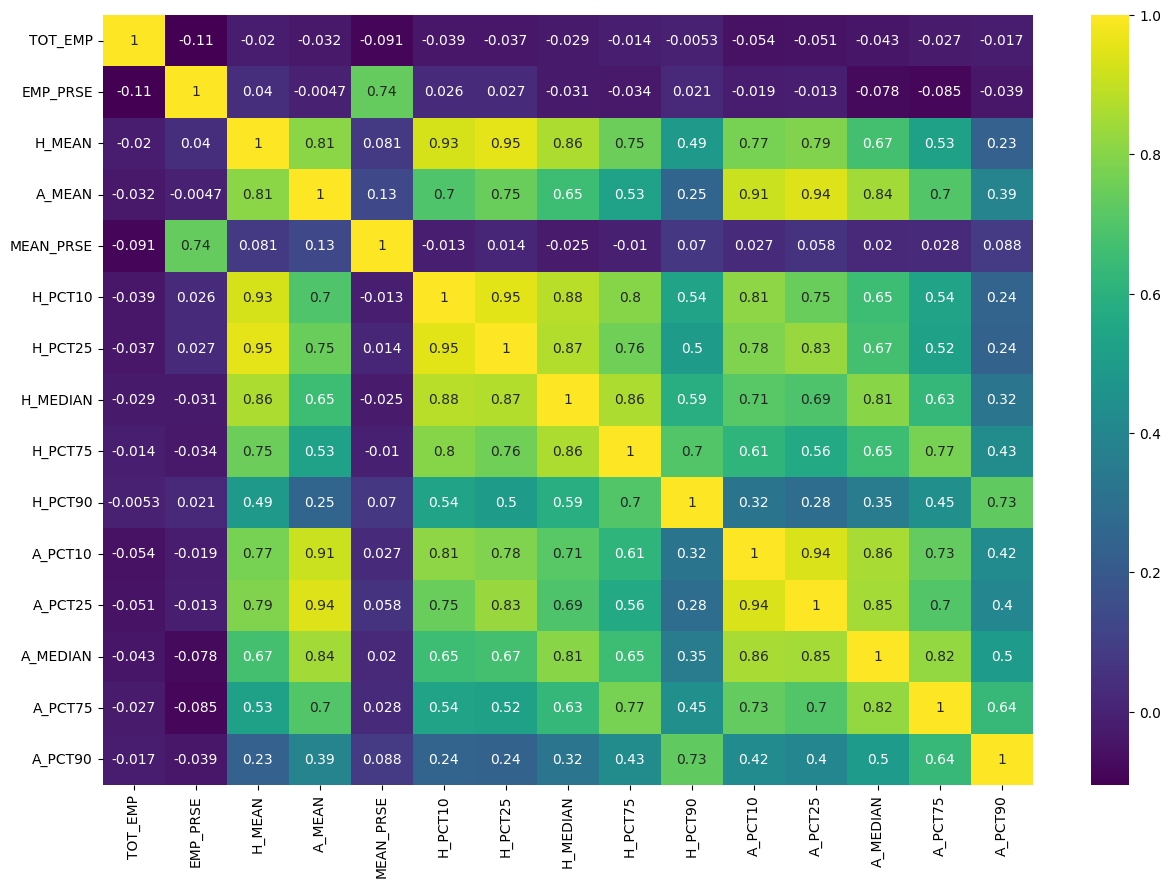

In [98]:

corr_data = national_M2019_dl_sheet_dfs['national_M2019_dl'].loc[:,['TOT_EMP', 'EMP_PRSE','H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN','H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75','A_PCT90']].corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr_data, annot=True, cmap="viridis")

### Reading National M 2023 files

In [99]:
folder_oesm23nat = 'project_data/oesm23nat'

In [100]:
national_M2023_dl_filename = "national_M2023_dl.xlsx"

In [101]:
national_M2023_dl_path = get_filepath(cwd, folder_oesm23nat, national_M2023_dl_filename)
national_M2023_dl_path

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/LabourData/notebooks/project_data/oesm23nat/national_M2023_dl.xlsx')

In [102]:
national_M2023_dl = pd.ExcelFile(national_M2023_dl_path)

In [103]:
national_M2023_dl_sheet_names = national_M2023_dl.sheet_names

national_M2023_dl_sheet_dfs = {}

for sheet_name in national_M2023_dl_sheet_names:
    national_M2023_dl_sheet_dfs[sheet_name] = pd.read_excel(national_M2023_dl_path, sheet_name=sheet_name)

In [104]:
national_M2023_dl_sheet_dfs.keys()

dict_keys(['national_M2023_dl', 'Field Descriptions', 'UpdateTime', 'Filler'])

In [105]:
national_M2023_dl_sheet_dfs['national_M2023_dl']

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.4,29050,35660,48060,76980,121470,NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,54550,78330,116880,169090,231620,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,46400,66170,103460,165500,#,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,53-7081,Refuse and Recyclable Material Collectors,...,22,28.06,32.68,30050,36100,45760,58360,67970,NaN,NaN
1399,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,53-7120,"Tank Car, Truck, and Ship Loaders",...,28.18,34.96,42.7,38850,46500,58620,72710,88810,NaN,NaN
1400,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,53-7121,"Tank Car, Truck, and Ship Loaders",...,28.18,34.96,42.7,38850,46500,58620,72710,88810,NaN,NaN
1401,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,53-7190,Miscellaneous Material Moving Workers,...,19.38,23.3,30.5,32240,34830,40310,48460,63430,NaN,NaN


In [106]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].drop(['AREA','AREA_TITLE','AREA_TYPE','NAICS','NAICS_TITLE','I_GROUP','JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL','PCT_RPT'], axis=1, inplace=True)
national_M2023_dl_sheet_dfs['national_M2023_dl']

,PRIM_STATE,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,US,1235,00-0000,All Occupations,total,151853870,0.0,31.48,65470,0.3,...,23.11,37.01,58.4,29050,35660,48060,76980,121470,NaN,NaN
1,US,1235,11-0000,Management Occupations,major,10495770,0.4,66.23,137750,0.5,...,56.19,81.29,111.36,54550,78330,116880,169090,231620,NaN,NaN
2,US,1235,11-1000,Top Executives,minor,3751510,0.4,65.43,136100,0.9,...,49.74,79.57,#,46400,66170,103460,165500,#,NaN,NaN
3,US,1235,11-1010,Chief Executives,broad,211230,1.4,124.47,258900,0.7,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
4,US,1235,11-1011,Chief Executives,detailed,211230,1.4,124.47,258900,0.7,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,US,1235,53-7081,Refuse and Recyclable Material Collectors,detailed,135430,1.3,22.99,47810,0.7,...,22,28.06,32.68,30050,36100,45760,58360,67970,NaN,NaN
1399,US,1235,53-7120,"Tank Car, Truck, and Ship Loaders",broad,11400,4.7,29.1,60530,1.5,...,28.18,34.96,42.7,38850,46500,58620,72710,88810,NaN,NaN
1400,US,1235,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,11400,4.7,29.1,60530,1.5,...,28.18,34.96,42.7,38850,46500,58620,72710,88810,NaN,NaN
1401,US,1235,53-7190,Miscellaneous Material Moving Workers,broad,23970,3.4,22.04,45840,1.0,...,19.38,23.3,30.5,32240,34830,40310,48460,63430,NaN,NaN


In [107]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].columns

Index(['PRIM_STATE', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25',
       'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN',
       'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [108]:
columns_to_replace = [
    'H_MEAN','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_MEAN','A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]
national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].astype(str)

In [109]:

national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   H_MEAN    1403 non-null   object
 1   H_PCT10   1403 non-null   object
 2   H_PCT25   1403 non-null   object
 3   H_MEDIAN  1403 non-null   object
 4   H_PCT75   1403 non-null   object
 5   H_PCT90   1403 non-null   object
 6   A_MEAN    1403 non-null   object
 7   A_PCT10   1403 non-null   object
 8   A_PCT25   1403 non-null   object
 9   A_MEDIAN  1403 non-null   object
 10  A_PCT75   1403 non-null   object
 11  A_PCT90   1403 non-null   object
dtypes: object(12)
memory usage: 131.7+ KB


In [110]:
national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = \
    national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].applymap(
        lambda x: x.replace('*', '0').replace('#', '0')
    )

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_3570/2003815885.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].applymap(


In [111]:
# national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace] = \
#     national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].applymap(
#         lambda x: x.replace('', '0').replace('', '0')
#     )

In [112]:
national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].astype(np.float64)

In [113]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRIM_STATE  1403 non-null   object 
 1   OWN_CODE    1403 non-null   int64  
 2   OCC_CODE    1403 non-null   object 
 3   OCC_TITLE   1403 non-null   object 
 4   O_GROUP     1403 non-null   object 
 5   TOT_EMP     1403 non-null   int64  
 6   EMP_PRSE    1403 non-null   float64
 7   H_MEAN      1403 non-null   float64
 8   A_MEAN      1403 non-null   float64
 9   MEAN_PRSE   1403 non-null   float64
 10  H_PCT10     1403 non-null   float64
 11  H_PCT25     1403 non-null   float64
 12  H_MEDIAN    1403 non-null   float64
 13  H_PCT75     1403 non-null   float64
 14  H_PCT90     1403 non-null   float64
 15  A_PCT10     1403 non-null   float64
 16  A_PCT25     1403 non-null   float64
 17  A_MEDIAN    1403 non-null   float64
 18  A_PCT75     1403 non-null   float64
 19  A_PCT90     1403 non-null  

In [114]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].columns

Index(['PRIM_STATE', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25',
       'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN',
       'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between Numerical Data in National 2023 data')

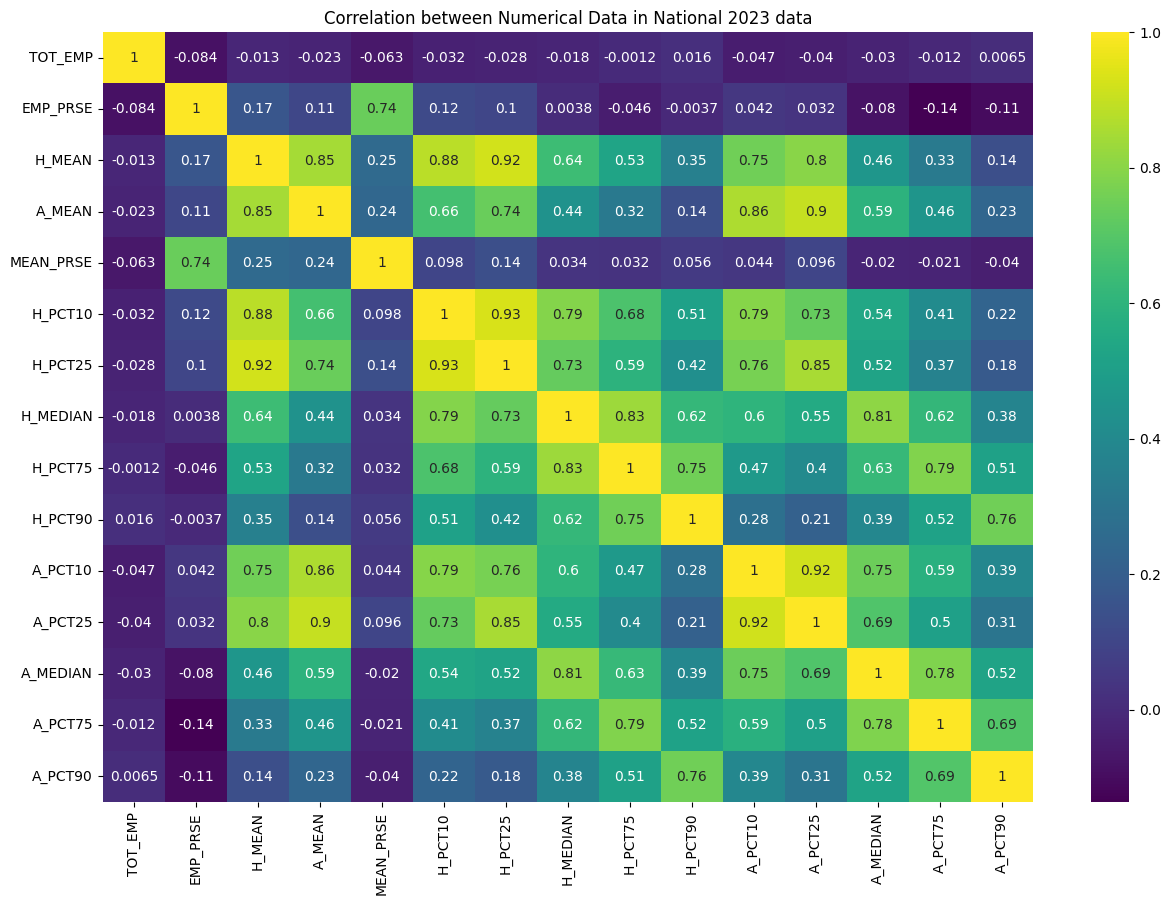

In [115]:

corr_data_23 = national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[:,['TOT_EMP', 'EMP_PRSE','H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN','H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75','A_PCT90']].corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr_data_23, annot=True, cmap="viridis")
plt.title("Correlation between Numerical Data in National 2023 data")


## https://panel.holoviz.org/reference/index.html#panes

In [116]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[:,['OCC_TITLE', 'TOT_EMP']]

,OCC_TITLE,TOT_EMP
0,All Occupations,151853870
1,Management Occupations,10495770
2,Top Executives,3751510
3,Chief Executives,211230
4,Chief Executives,211230
...,...,...
1398,Refuse and Recyclable Material Collectors,135430
1399,"Tank Car, Truck, and Ship Loaders",11400
1400,"Tank Car, Truck, and Ship Loaders",11400
1401,Miscellaneous Material Moving Workers,23970


In [117]:
len(np.unique(national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[:, ['OCC_TITLE']]))

1138

### Occupational Employment and Wage Statistics (OEWS) Survey

- Here since there are `1138` different Occupcation Titles, we use the top `100 rows in both 2019 and 2023` occupational Employment survey data

In [118]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [119]:
hvplot.extension("bokeh")

table_2023 = hv.Table(national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[1:, ['OCC_TITLE', 'TOT_EMP','EMP_PRSE','H_MEDIAN','A_MEDIAN']].head(100)
                  ).opts(width=1000, 
                         height=300, 
                         show_grid=True,
                         bgcolor='white',
                         visible=True,title = "2023 data")

bar_2023 = national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[1:,:].head(100).hvplot.bar(
    x='OCC_TITLE', 
    y='A_MEDIAN',
    width=1000, 
    height=1200  
).opts(
    xrotation=90,
    padding=0.4,
    margin=1,
    fontsize='12pt',
    show_legend=True,
    title="Total Employees by Occupation",
    tools=['hover'],
    show_frame=True,
    hover_color='black',
    ylabel = "A_MEDIAN(Annual wage in USD)"
)


table_2019 = hv.Table(national_M2019_dl_sheet_dfs['national_M2019_dl'].loc[1:, ['OCC_TITLE', 'TOT_EMP','EMP_PRSE','H_MEDIAN','A_MEDIAN']].head(100)
                  ).opts(width=1000, 
                         height=300, 
                         show_grid=True,
                         bgcolor='white',
                         visible=True, title = "2019 data")

bar_2019 = national_M2019_dl_sheet_dfs['national_M2019_dl'].loc[1:,:].head(100).hvplot.bar(x='OCC_TITLE', 
    y='A_MEDIAN',
    width=1000, 
    height=1200  
).opts(
    xrotation=90,
    padding=0.4,
    margin=1,
    fontsize='12pt',
    show_legend=True,
    title="Total Employees by Occupation",
    tools=['hover'],
    show_frame=True,
    hover_color='black',
    ylabel = "A_MEDIAN(Annual wage in USD)"
)


dashboard = pn.Column(pn.Row(table_2019, table_2023),pn.Row(bar_2019, bar_2023))

dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'7b5b45e4-ecd6-42d0-b79e-8e712543ec0d': {'version…

In [120]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRIM_STATE  1403 non-null   object 
 1   OWN_CODE    1403 non-null   int64  
 2   OCC_CODE    1403 non-null   object 
 3   OCC_TITLE   1403 non-null   object 
 4   O_GROUP     1403 non-null   object 
 5   TOT_EMP     1403 non-null   int64  
 6   EMP_PRSE    1403 non-null   float64
 7   H_MEAN      1403 non-null   float64
 8   A_MEAN      1403 non-null   float64
 9   MEAN_PRSE   1403 non-null   float64
 10  H_PCT10     1403 non-null   float64
 11  H_PCT25     1403 non-null   float64
 12  H_MEDIAN    1403 non-null   float64
 13  H_PCT75     1403 non-null   float64
 14  H_PCT90     1403 non-null   float64
 15  A_PCT10     1403 non-null   float64
 16  A_PCT25     1403 non-null   float64
 17  A_MEDIAN    1403 non-null   float64
 18  A_PCT75     1403 non-null   float64
 19  A_PCT90     1403 non-null  

In [121]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OWN_CODE   1329 non-null   int64  
 1   OCC_CODE   1329 non-null   object 
 2   OCC_TITLE  1329 non-null   object 
 3   O_GROUP    1329 non-null   object 
 4   TOT_EMP    1329 non-null   int64  
 5   EMP_PRSE   1329 non-null   float64
 6   H_MEAN     1329 non-null   float64
 7   A_MEAN     1329 non-null   float64
 8   MEAN_PRSE  1329 non-null   float64
 9   H_PCT10    1329 non-null   float64
 10  H_PCT25    1329 non-null   float64
 11  H_MEDIAN   1329 non-null   float64
 12  H_PCT75    1329 non-null   float64
 13  H_PCT90    1329 non-null   float64
 14  A_PCT10    1329 non-null   float64
 15  A_PCT25    1329 non-null   float64
 16  A_MEDIAN   1329 non-null   float64
 17  A_PCT75    1329 non-null   float64
 18  A_PCT90    1329 non-null   float64
 19  ANNUAL     82 non-null     object 
 20  HOURLY  

In [122]:
import hvplot.pandas

hvexplorer = national_M2023_dl_sheet_dfs['national_M2023_dl'].hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'6034b4bd-e68d-4816-a31a-2fe4a38de8e2': {'version…